In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from keras.datasets import boston_housing

(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data()

In [9]:
print("Shape of training data:",str(train_data.shape))
print("Shape of training labels:",str(train_labels.shape))
print("Shape of testing data:",str(test_data.shape))
print("Shape of testing labels:",str(test_labels.shape))

Shape of training data: (404, 13)
Shape of training labels: (404,)
Shape of testing data: (102, 13)
Shape of testing labels: (102,)


In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [30]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(64,activation = 'relu',input_shape=(train_data.shape[1],)),
     tf.keras.layers.Dense(64,activation = 'relu'),
     tf.keras.layers.Dense(1)
    ]
)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(train_data,train_labels,epochs = 80)

Epoch 1/80
13/13 [==============================] - 0s 1ms/step - loss: 497.1414 - mae: 20.3340
Epoch 2/80
13/13 [==============================] - 0s 1ms/step - loss: 388.3188 - mae: 17.5471
Epoch 3/80
13/13 [==============================] - 0s 1ms/step - loss: 278.3669 - mae: 14.4511
Epoch 4/80
13/13 [==============================] - 0s 1ms/step - loss: 176.1007 - mae: 11.0113
Epoch 5/80
13/13 [==============================] - 0s 1ms/step - loss: 105.7087 - mae: 8.0242
Epoch 6/80
13/13 [==============================] - 0s 1ms/step - loss: 69.1438 - mae: 6.3350
Epoch 7/80
13/13 [==============================] - 0s 1ms/step - loss: 49.3362 - mae: 5.2970
Epoch 8/80
13/13 [==============================] - 0s 1ms/step - loss: 37.4947 - mae: 4.5426
Epoch 9/80
13/13 [==============================] - 0s 1ms/step - loss: 30.5763 - mae: 4.0389
Epoch 10/80
13/13 [==============================] - 0s 1ms/step - loss: 26.2501 - mae: 3.6889
Epoch 11/80
13/13 [==============================]

In [32]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


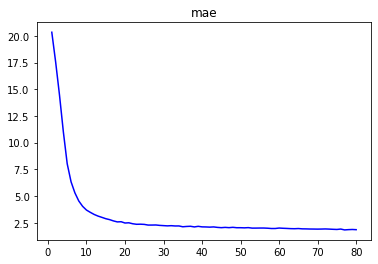

<Figure size 432x288 with 0 Axes>

In [41]:
x = [i for i in range(1,81)]
y = history.history['mae']

plt.plot(x,y,'b')
plt.title('mae')
plt.figure()
plt.show()

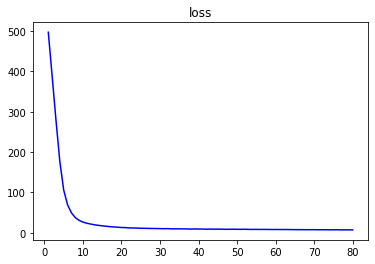

<Figure size 432x288 with 0 Axes>

In [34]:
x = [i for i in range(1,81)]
y = history.history['loss']

plt.plot(x,y,'b')
plt.title('loss')
plt.figure()
plt.show()

In [35]:
predictions = model.predict(test_data)
print(predictions.shape)

(102, 1)


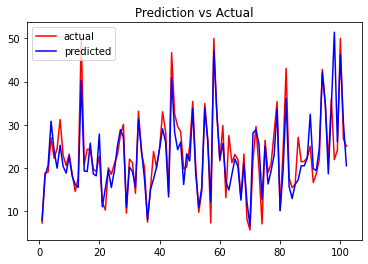

In [36]:
x = [i for i in range(1,103)]
plt.plot(x,test_labels,'r',label='actual')
plt.plot(x,predictions,'b',label='predicted')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

In [40]:
from math import sqrt
mse = 1/102 * sqrt(abs(np.sum(predictions**2 - train_labels**2)))
print('MSE === ',mse)

MSE ===  6.443909227122985
